In [ ]:
!curl -fsSL https://download.docker.com/linux/static/stable/x86_64/docker-18.06.1-ce.tgz \
    | sudo tar -xzC /usr/local/bin --strip=1 docker/docker

In [ ]:
!sudo docker -v

In [ ]:
!sudo docker ps -a

In [ ]:
result = !sudo docker ps

In [ ]:
kafka = ""
for line in result :
    for word in line.split() :
        if word.find("pwd_kafka.1.") != -1 :
            kafka = word
print(kafka)

In [1]:
!pip install kafka-python

    100% |████████████████████████████████| 256kB 3.3MB/s ta 0:00:01
You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
from kafka import KafkaConsumer

consumer = KafkaConsumer('test', bootstrap_servers=kafka+':9092')

for msg in consumer:
    print(msg)

受ける側を動かしたら、別のnbで投げる側を動かす。

In [ ]:
import sys

from kafka import KafkaConsumer

consumer = KafkaConsumer('test', bootstrap_servers=kafka+':9092')

for msg in consumer:
    outfile = open("test1.png", 'wb')
    outfile.write(msg.value)
    outfile.close()

In [ ]:
import sys
from IPython.display import Image, display_jpeg
from kafka import KafkaConsumer

consumer = KafkaConsumer('distributed-video1', bootstrap_servers=["kafka:9092"])

n = 1
for msg in consumer:
    outfile = open("c_photo"+str(n)+".jpeg", 'wb')
    outfile.write(msg.value)
    outfile.close()
    print("save : " + str(n))
    display_jpeg(Image("c_photo"+str(n)+".jpeg"))
    n += 1


In [ ]:
%matplotlib notebook

import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

frames = 60

for count in range(frames) :
    im = Image.open("photo"+str(count%5+1)+".jpeg")
    im_list = np.asarray(im)
    plt.imshow(im_list)
    plt.pause(.1)


<IPython.core.display.Javascript object>


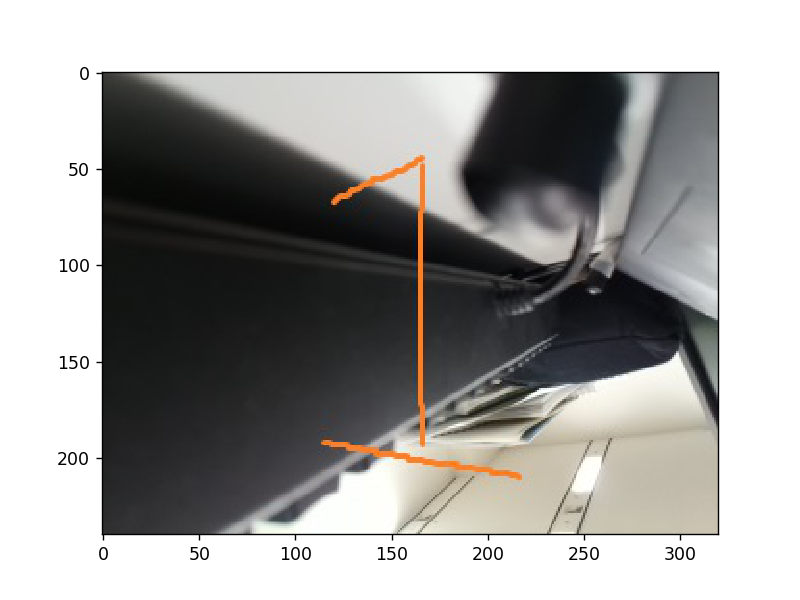

In [11]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from PIL import Image
import time

N = 50

fig, ax = plt.subplots()

def update(i):
    im = Image.open("photo"+str(i%5+1)+".jpeg")
    im_list = np.asarray(im)
    plt.clf()
    plt.imshow(im_list)

hoge = animation.FuncAnimation(fig, update, interval=100)  # 代入しないと消される
plt.show()

<IPython.core.display.Javascript object>


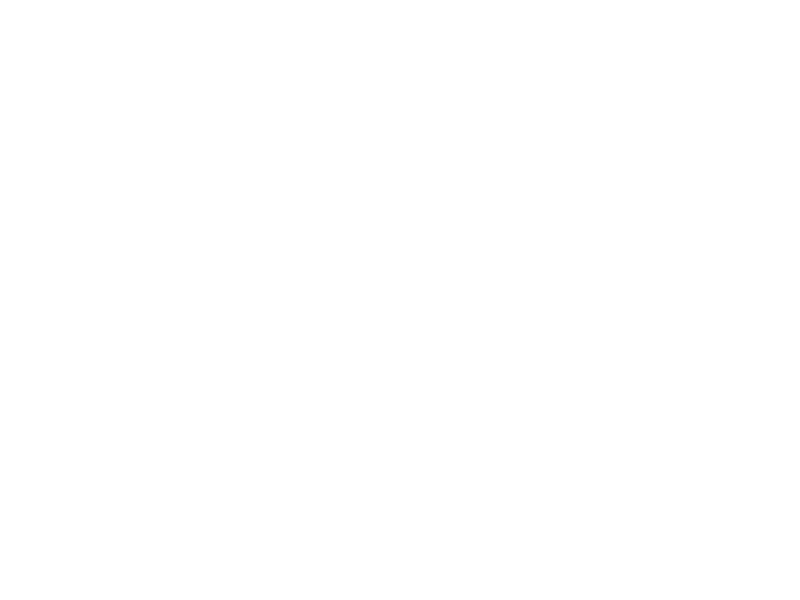

In [14]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from kafka import KafkaConsumer

fig, ax = plt.subplots()

consumer = KafkaConsumer('distributed-video1', bootstrap_servers=["kafka:9092"])

def update(msg):
    im_list = np.asarray(msg.value)
    plt.clf()
    plt.imshow(im_list)

hoge = animation.FuncAnimation(fig, update, consumer, interval=100)  # 代入しないと消される
plt.show()
